In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords


import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
data = pd.read_csv(r"data\amazon_alexa.tsv", delimiter='\t', quoting=3)

In [109]:
print(f"data description {data.describe()}")

data description             rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000


In [110]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [111]:
print(f"Feature names : {data.columns}")

Feature names : Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


In [112]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [113]:
data[data['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [114]:
data.dropna(inplace=True)

In [115]:
data['lenght']=data['verified_reviews'].apply(len)


In [116]:
print((f" 'Verified Reviews' : {data.iloc[10].verified_reviews} "))
print(f"Lenght of the review: {len(data.iloc[10].verified_reviews)}")

 'Verified Reviews' : "I sent it to my 85 year old Dad, and he talks to it constantly." 
Lenght of the review: 65


In [117]:
len(data)

3149

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   lenght            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.2+ KB


In [119]:
print(f"Rating : {data.rating.value_counts()}")

Rating : rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


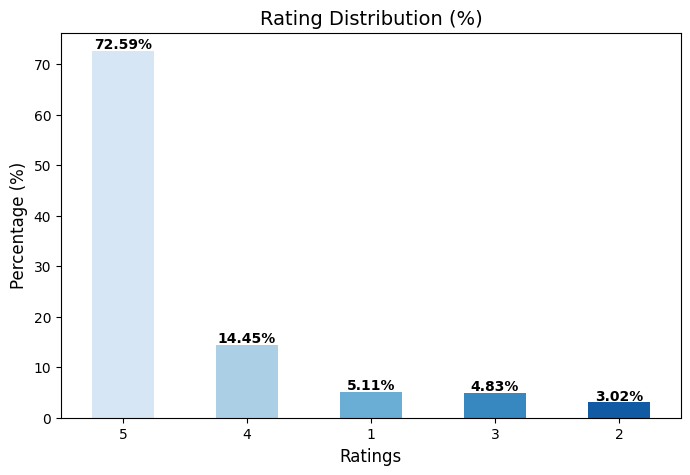

In [120]:


rating_dist = (data['rating'].value_counts(normalize=True) * 100).round(2)

colors = sns.color_palette("Blues", len(rating_dist))

ax = rating_dist.plot(kind='bar', color=colors, figsize=(8,5))

plt.title('Rating Distribution (%)', fontsize=14)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
for i, v in enumerate(rating_dist):
    plt.text(i, v + 0.5, f"{v}%", ha='center', fontsize=10, fontweight='bold')

plt.xticks(rotation=0)
plt.show()



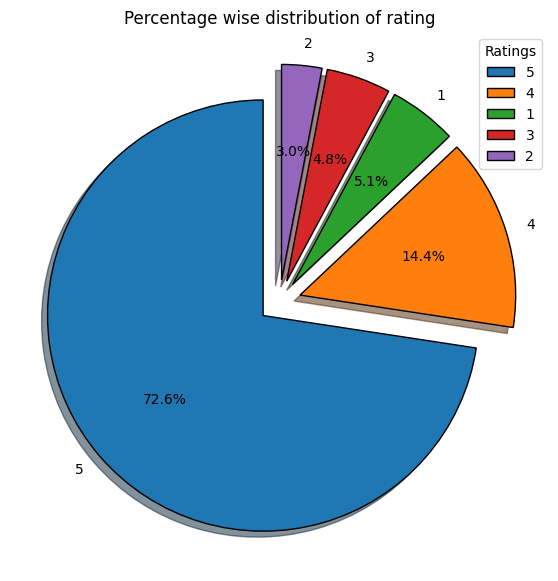

In [121]:

from io import BytesIO

# Figure
fig = plt.figure(figsize=(7,7))

# Palette de couleurs (si tu as plus que 5 notes, ça s’adapte automatiquement avec tab10)
colors = plt.cm.tab10.colors  

# Styles de bordures
wp = {'linewidth': 1, "edgecolor": 'black'}

# Distribution des notes
tags = data['rating'].value_counts(normalize=True)

# Décalage pour bien séparer chaque secteur
explode = [0.1] * len(tags)

# Pie chart
tags.plot(
    kind='pie',
    autopct="%1.1f%%",
    shadow=True,
    colors=colors[:len(tags)],  # adapte les couleurs au nb de catégories
    startangle=90,
    wedgeprops=wp,
    explode=explode
)

plt.ylabel("")  # enlève le label par défaut
plt.title("Percentage wise distribution of rating")

# Ajouter une légende claire
plt.legend(title="Ratings", loc="upper right")

# Sauvegarde dans un buffer
graph = BytesIO()
fig.savefig(graph, format="png")


In [122]:
print(f"Feedbacks : {data.feedback.value_counts()}")

Feedbacks : feedback
1    2893
0     256
Name: count, dtype: int64


In [123]:
##Extracting the 'verified_reviews' value for one record with feedback = 0

data[data['feedback']==0]['verified_reviews'].iloc[2]

'Not much features.'

In [124]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

data[data['feedback'] == 1].iloc[1]['verified_reviews']


'Loved it!'

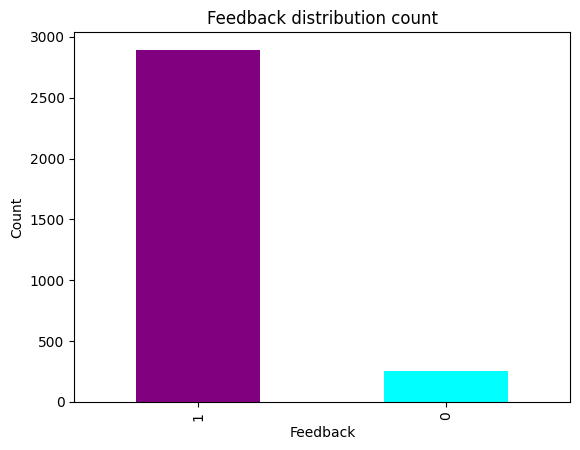

In [125]:
# Bar graph to visualize the total counts of each feedback
data['feedback'].value_counts().plot.bar(
    color=['purple', 'cyan']
)

plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()


In [126]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records
data['feedback'].value_counts()/data.shape[0]*100

feedback
1    91.870435
0     8.129565
Name: count, dtype: float64

<Axes: ylabel='Percentage wise distrubution of feedback'>

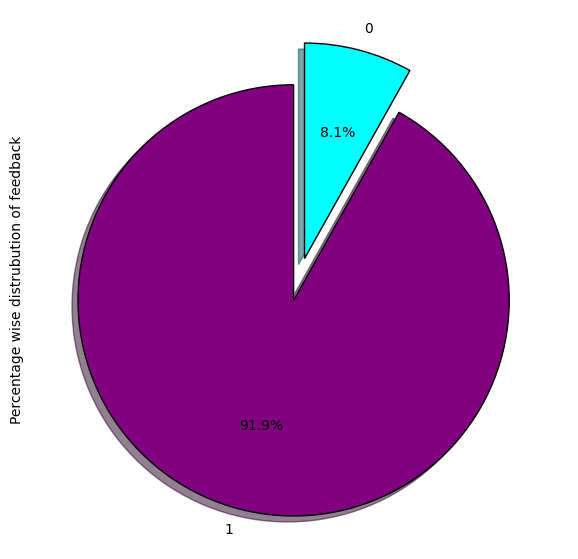

In [127]:
fig = plt.figure(figsize=(7,7))

colors = ('purple', 'cyan')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [128]:
#let's see the 'rating' values for different values of 'feedback'
data.groupby('feedback')['rating'].value_counts()

feedback  rating
0         1          161
          2           95
1         5         2286
          4          455
          3          152
Name: count, dtype: int64

In [129]:
#Distinct values of 'variation' and its count 

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


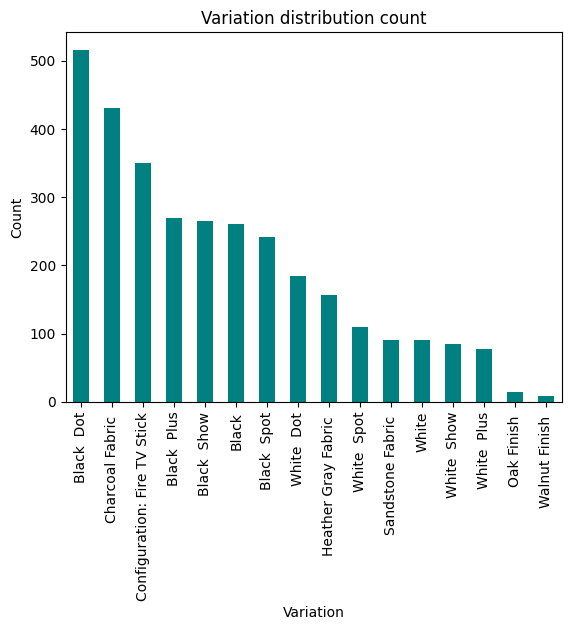

In [130]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'teal')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [131]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")


Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [132]:
data.groupby('variation')['rating'].mean()


variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

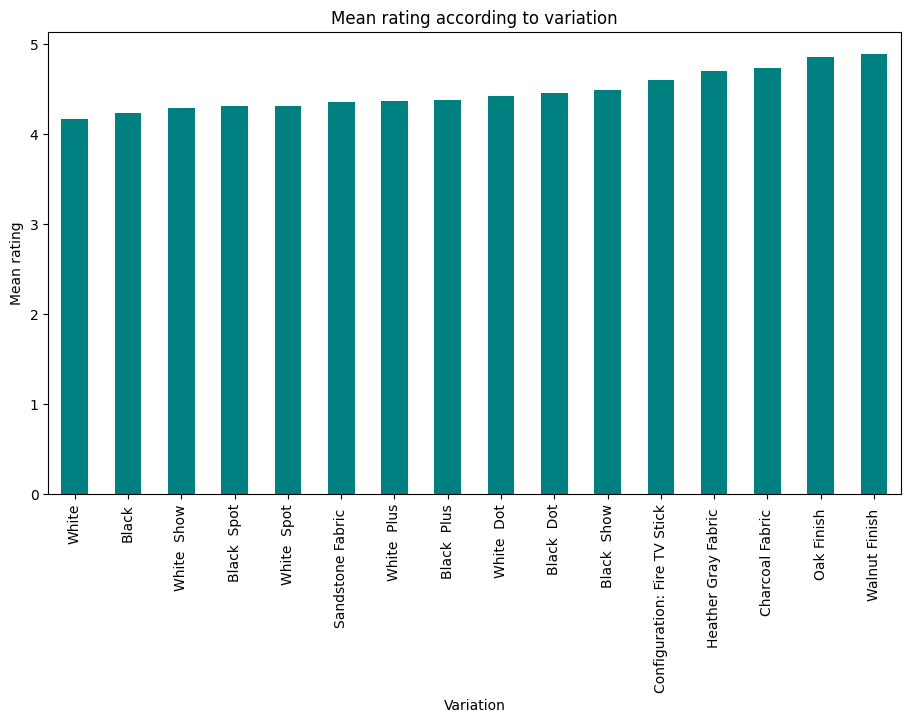

In [133]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'teal', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [134]:
data['lenght'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: lenght, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

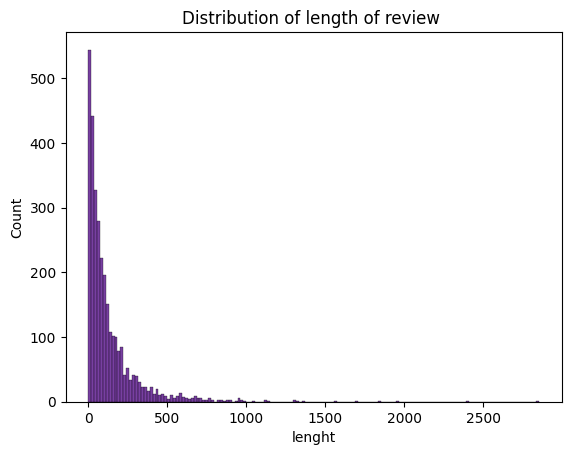

In [135]:
sns.histplot(data['lenght'],color='indigo').set(title='Distribution of length of review ')

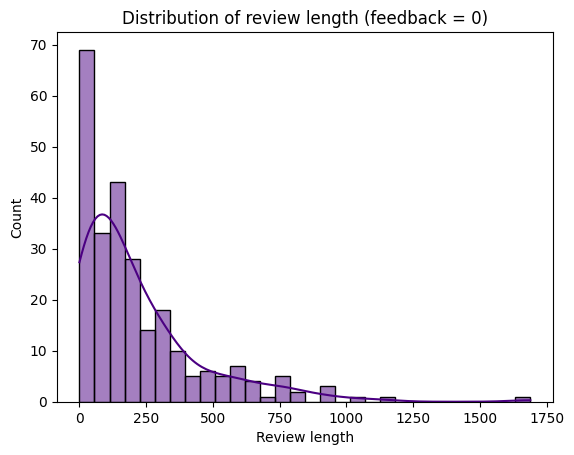

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(
    data[data['feedback'] == 0]['lenght'], 
    color='indigo', 
    bins=30,          # tu peux régler le nombre de barres
    kde=True          # ajoute une courbe de densité
).set(
    title='Distribution of review length (feedback = 0)',
    xlabel='Review length',
    ylabel='Count'
)

plt.show()


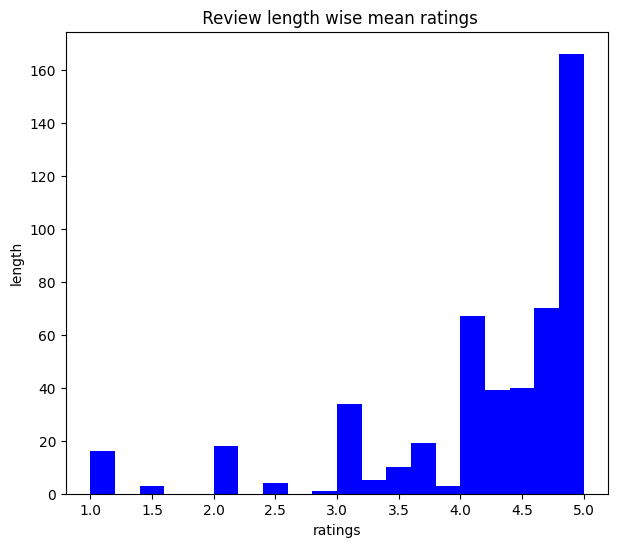

In [137]:
data.groupby('lenght')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

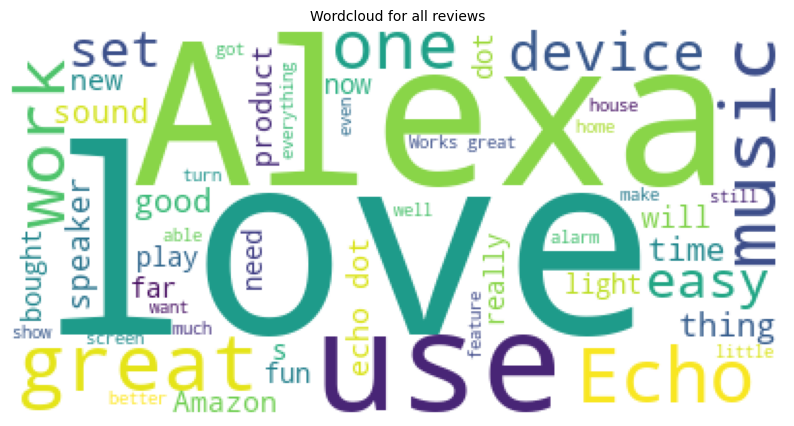

In [138]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

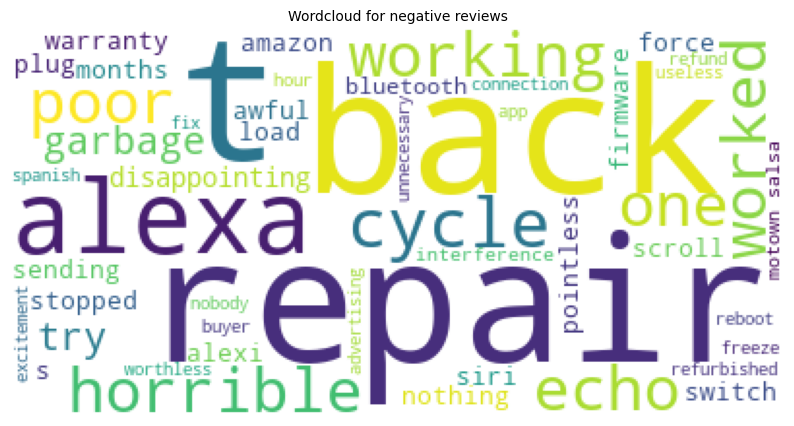

In [139]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

In [140]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [141]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [142]:
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [144]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


In [145]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [146]:
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))


In [147]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [148]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9941016333938294
Testing Accuracy : 0.944973544973545


In [149]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

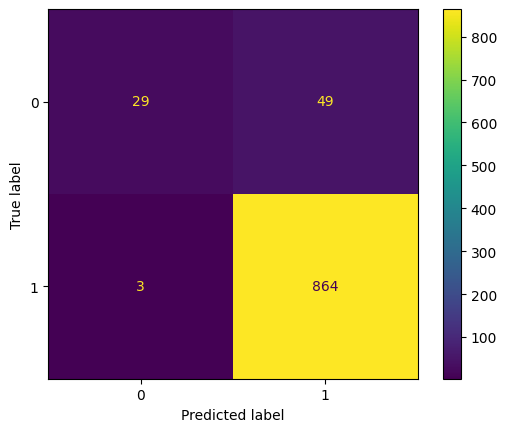

In [150]:
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [151]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9301254627725216
Standard Variance : 0.006810805731022454


In [152]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [153]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [154]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [155]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [156]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.971415607985481
Testing Accuracy : 0.9417989417989417


In [157]:
y_preds = model_xgb.predict(X_test)
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 31  47]
 [ 13 854]]


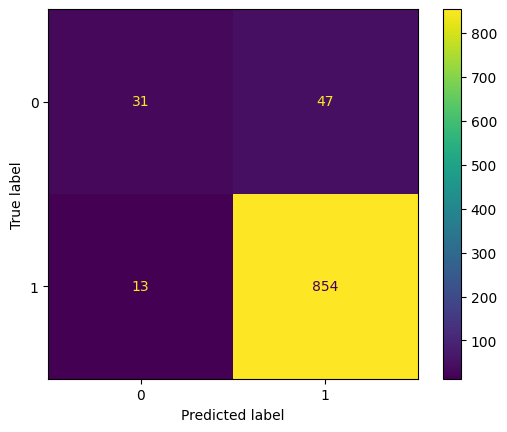

In [158]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [159]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

In [160]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)
DecisionTreeClassifier()
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))




Training Accuracy : 0.9941016333938294
Testing Accuracy : 0.9206349206349206


[[ 42  36]
 [ 78 789]]


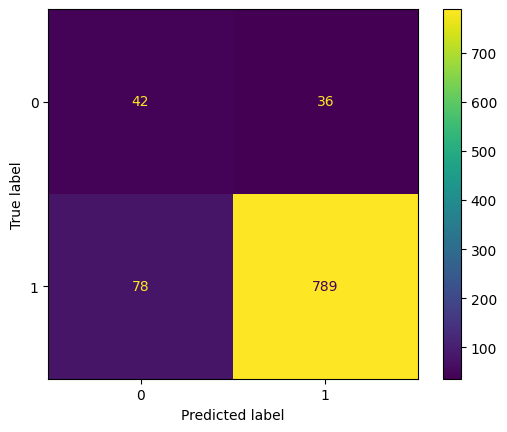

In [161]:
y_preds = model_dt.predict(X_test)
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [162]:
pickle.dump(model_dt, open('Models/model_dt.pkl', 'wb'))

In [163]:
pickle.dump(model_rf, open('Models/model_rf.pkl', 'wb'))